## Library Import

In [1]:
import os
import cv2 as cv
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from skimage.measure import shannon_entropy
from sklearn.mixture import GaussianMixture
import warnings
from sklearn.model_selection import GridSearchCV, ShuffleSplit
warnings.filterwarnings("ignore")

### Import gambar

In [2]:
imageDataset ="D:/Final Project/Data/remove-semua/"
list_img_bp = [] 
list_label_bp = []

for filename in os.listdir(imageDataset):  
    image = cv.imread(imageDataset + filename, 0)
    list_img_bp.append(image.flatten())
    list_label_bp.append(os.path.splitext(filename)[0].split('_')[1])

In [3]:
list_img_bp[0].shape

(5600,)

In [4]:
list_label_bp

['10',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '1',
 '11',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '2',
 '12',
 '13',
 '13',
 '13',
 '13',
 '13',
 '13',
 '13',
 '13',
 '13',
 '2',
 '13',
 '14',
 '14',
 '14',
 '14',
 '14',
 '14',
 '14',
 '14',
 '14',
 '2',
 '14',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '2',
 '15',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '16',
 '2',
 '16',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '2',
 '17',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '2',
 '18',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '2',
 '19',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '2',
 '1',
 '20',
 '21',
 '21',
 '21',
 '21',
 '21',
 '21',
 '21',
 '21',
 '21',
 '2',
 '21',
 '22',
 '22',
 '22',
 '22',
 '22',
 '22',
 '22',
 '22',
 '22',
 '3',
 '22',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '23',
 '3',
 '23',

### Split data untuk backpropag saja

In [5]:
X_train_bp, X_test_bp, y_train_bp, y_test_bp = train_test_split(list_img_bp, list_label_bp, test_size=0.2, random_state=10, stratify=list_label_bp)

In [6]:
print("Jumlah data training: ",len(X_train_bp))
print("Jumlah data testing: ", len(X_test_bp))

Jumlah data training:  328
Jumlah data testing:  82


### MLP Classifier without GMM

In [7]:
scaler = StandardScaler()
scaler.fit(X_train_bp)
X_train_bp = scaler.transform(X_train_bp)
X_test_bp = scaler.transform(X_test_bp)

In [8]:
bp_only = MLPClassifier(activation='relu', solver= 'sgd', hidden_layer_sizes=(370,), random_state=8, 
                        max_iter=100000, learning_rate='adaptive', learning_rate_init=0.8, 
                        tol=0.001, early_stopping=False, verbose=True)
start = time.time()
bp_only.fit(X_train_bp, y_train_bp)
stop = time.time()
print(f"Epoch: {bp_only.n_iter_}")
print(f"Training time: {stop - start} s")
print(f"Accuracy: {accuracy_score(y_test_bp, bp_only.predict(X_test_bp))}")

Iteration 1, loss = 10.83100683
Iteration 2, loss = 34.00132726
Iteration 3, loss = 75.17518707
Iteration 4, loss = 136560.80202838
Iteration 5, loss = 330201461.18966967
Iteration 6, loss = 563752902790.06188965
Iteration 7, loss = 1931380185824886.75000000
Iteration 8, loss = 10814541393477543936.00000000
Iteration 9, loss = 50017558224463479177216.00000000
Iteration 10, loss = 166842525083066098125897728.00000000
Iteration 11, loss = 873889937729010199367212072960.00000000
Iteration 12, loss = 2243686877832284618212411917205504.00000000
Training loss did not improve more than tol=0.001000 for 10 consecutive epochs. Setting learning rate to 0.160000
Iteration 13, loss = 1472706540783928298990370576673013760.00000000
Iteration 14, loss = 17508657500300443993287157490808520704.00000000
Iteration 15, loss = 70530394464701492624470337123782754304.00000000
Iteration 16, loss = 379612667230942743964528433160632926208.00000000
Iteration 17, loss = 2284490219187851849477424029224941912064.00

Iteration 102, loss = 2505593612903039265184783797332884765961879552.00000000
Iteration 103, loss = 2505593666423824387843732972901375096895045632.00000000
Iteration 104, loss = 2505593709714558881058651022433540347265024000.00000000
Iteration 105, loss = 2505593744745521966062519484227420762486603776.00000000
Iteration 106, loss = 2505593773078084908496799596196162789961629696.00000000
Iteration 107, loss = 2505593796004090469557126346791983093213298688.00000000
Iteration 108, loss = 2505593814514805290579868623447360922804289536.00000000
Iteration 109, loss = 2505593829442991200237407908633080379727675392.00000000
Iteration 110, loss = 2505593841501869307950003424029384956006367232.00000000
Iteration 111, loss = 2505593851232686489021201934849219774184947712.00000000
Training loss did not improve more than tol=0.001000 for 10 consecutive epochs. Learning rate too small. Stopping.
Epoch: 111
Training time: 25.941989183425903 s
Accuracy: 0.5975609756097561


### Loss terkecil untuk Backpropag diatas

In [9]:
bp_only.best_loss_

10.831006832040574

### Lost Curve Backpropag without GMM

Text(0.5, 1.0, 'Loss Curve Backpropag tanpa GMM')

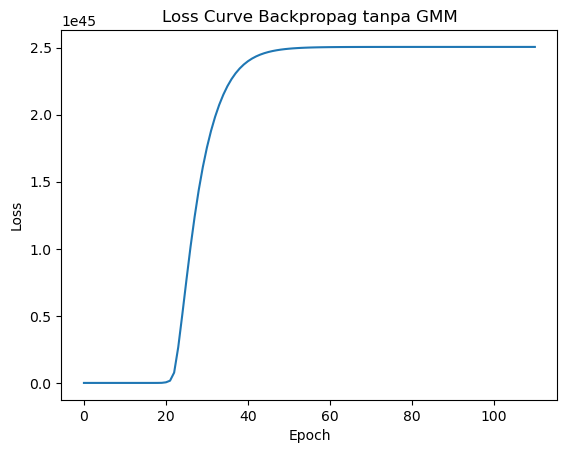

In [10]:
plt.plot(bp_only.loss_curve_)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve Backpropag tanpa GMM')

### Akurasi Sebelum GMM

In [11]:
print("Training set score: %f" % bp_only.score(X_train_bp, y_train_bp))
print("Test set score: %f" % bp_only.score(X_test_bp, y_test_bp))

Training set score: 0.972561
Test set score: 0.597561


              precision    recall  f1-score   support

           1       0.33      0.50      0.40         2
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       1.00      1.00      1.00         2
          13       0.00      0.00      0.00         2
          14       1.00      1.00      1.00         2
          15       1.00      0.50      0.67         2
          16       1.00      1.00      1.00         2
          17       0.40      1.00      0.57         2
          18       1.00      1.00      1.00         2
          19       0.67      1.00      0.80         2
           2       1.00      1.00      1.00         2
          20       1.00      0.50      0.67         2
          21       0.67      1.00      0.80         2
          22       0.50      0.50      0.50         2
          23       0.00      0.00      0.00         2
          24       1.00      1.00      1.00         2
          25       0.50    

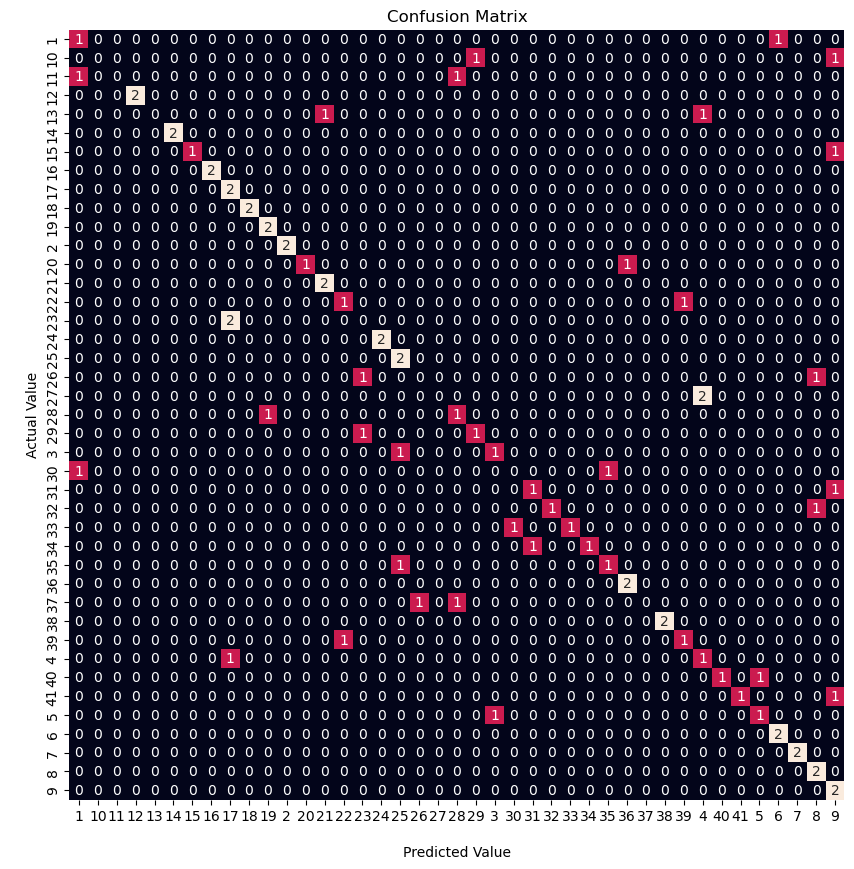

In [12]:
print(classification_report(y_test_bp,bp_only.predict(X_test_bp)))
f, ax = plt.subplots(figsize=(10,10))
cm=confusion_matrix(y_test_bp,bp_only.predict(X_test_bp), labels=bp_only.classes_)
cm=pd.DataFrame(cm, [bp_only.classes_],[bp_only.classes_])
ax =sns.heatmap(cm, annot=True, cbar=False)
ax.set_title('Confusion Matrix')
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('\nActual Value')

plt.show()

In [13]:
identified = sum(np.diagonal(cm))
print('Teridentifikasi sebelum GMM : ' + str(identified))

Teridentifikasi sebelum GMM : 49


### Ekstraksi Fitur Wajah dengan Gaussian Mixture Models

In [26]:
dataset = "D:/Final Project/Data/remove-semua/"
list_img = [] 
list_label = []

for imageName in os.listdir(dataset):  
    img = cv.imread(dataset + imageName, 0)  
    list_img.append(img)
    list_label.append(os.path.splitext(imageName)[0].split('_')[1])

matrix:
 [[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [66 48 31 ...  0  0  0]
 [50 47 30 ...  0  0  0]
 [32 45 28 ...  0  0  0]]
label: 10
shape: (80, 70)
gambar: AxesImage(80,52.8;496x369.6)


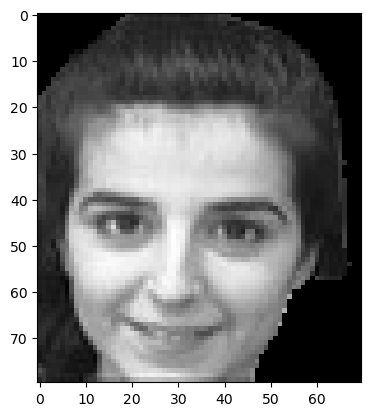

In [27]:
print("matrix:\n", list_img[400])
print("label:", list_label[400])
print("shape:", list_img[400].shape)
gambar = plt.imshow(list_img[400], cmap="gray")
print("gambar:", gambar)

In [28]:
print("There are {} images in the dataset".format(len(list_img)))
print("There are {} unique targets in the dataset".format(len(np.unique(list_label))))
print("Size of each image is {}x{}".format(list_img[0].shape[0],list_img[0].shape[1]))

There are 410 images in the dataset
There are 41 unique targets in the dataset
Size of each image is 80x70


## Gaussian Mixture Model

In [15]:
# Index for file naming
n = 0

for original_image in list_img: 
    # Flatenning Array
    reshape_img = original_image.reshape((-1,1))
    
    # Make GMM Model
    gmm_model = GaussianMixture(n_components = 3, random_state = 1).fit(reshape_img)
    
    gmm_label = gmm_model.predict(reshape_img)
    
    # Reshaping Array to Original Shape
    after_gmm = gmm_label.reshape(80, 70)
    
    cv.imwrite("D:/Final Project/Data/afterGMM/" + str(n+1) + "_" + str(list_label[n]) + ".png", after_gmm)
               
    n += 1
    print("Last File: ", n)

Last File:  1
Last File:  2
Last File:  3
Last File:  4
Last File:  5
Last File:  6
Last File:  7
Last File:  8
Last File:  9
Last File:  10
Last File:  11
Last File:  12
Last File:  13
Last File:  14
Last File:  15
Last File:  16
Last File:  17
Last File:  18
Last File:  19
Last File:  20
Last File:  21
Last File:  22
Last File:  23
Last File:  24
Last File:  25
Last File:  26
Last File:  27
Last File:  28
Last File:  29
Last File:  30
Last File:  31
Last File:  32
Last File:  33
Last File:  34
Last File:  35
Last File:  36
Last File:  37
Last File:  38
Last File:  39
Last File:  40
Last File:  41
Last File:  42
Last File:  43
Last File:  44
Last File:  45
Last File:  46
Last File:  47
Last File:  48
Last File:  49
Last File:  50
Last File:  51
Last File:  52
Last File:  53
Last File:  54
Last File:  55
Last File:  56
Last File:  57
Last File:  58
Last File:  59
Last File:  60
Last File:  61
Last File:  62
Last File:  63
Last File:  64
Last File:  65
Last File:  66
Last File:  67
Last

### Split data ektraksi GMM

In [14]:
dataset_gmm = "D:/Final Project/Data/afterGMM n=3,rs=1/"
img_gmm = [] #image matrix 
label_gmm = [] #image label

for filename in os.listdir(dataset_gmm):  
    img = cv.imread(dataset_gmm + filename, 0)  
    img_gmm.append(img.flatten())
    label_gmm.append(os.path.splitext(filename)[0].split('_')[1])

print(label_gmm)

['19', '20', '20', '20', '20', '20', '20', '20', '20', '20', '11', '2', '1', '20', '21', '21', '21', '21', '21', '21', '21', '1', '21', '21', '2', '21', '22', '22', '22', '22', '22', '22', '11', '22', '22', '22', '3', '22', '23', '23', '23', '23', '23', '12', '23', '23', '23', '23', '3', '23', '24', '24', '24', '24', '12', '24', '24', '24', '24', '24', '3', '24', '25', '25', '25', '12', '25', '25', '25', '25', '25', '25', '3', '25', '26', '26', '12', '26', '26', '26', '26', '26', '26', '26', '3', '26', '27', '12', '27', '27', '27', '27', '27', '27', '27', '27', '3', '27', '12', '28', '28', '28', '28', '28', '28', '28', '28', '28', '3', '12', '10', '28', '29', '29', '29', '29', '29', '29', '29', '29', '29', '12', '3', '29', '30', '30', '30', '30', '30', '30', '30', '30', '12', '30', '3', '1', '30', '31', '31', '31', '31', '31', '31', '2', '31', '31', '31', '3', '31', '32', '32', '32', '32', '32', '12', '32', '32', '32', '32', '4', '32', '33', '33', '33', '33', '13', '33', '33', '33', '3

In [15]:
X_train, X_test, y_train, y_test = train_test_split(img_gmm, label_gmm, test_size=0.2, random_state=10, stratify=label_gmm)

In [16]:
print("Jumlah data training: ",len(X_train))
print("Jumlah data testing: ", len(X_test))

Jumlah data training:  328
Jumlah data testing:  82


### Backpropagation + Gaussian Mixture Model

In [17]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
bp = MLPClassifier(activation='relu', solver='sgd', hidden_layer_sizes=(370,),
                   random_state=8, max_iter=100000, learning_rate='adaptive', 
                   learning_rate_init=0.8, tol=0.001, early_stopping=False, verbose=True)
start = time.time()
bp.fit(X_train, y_train)
stop = time.time()
print(f"Epoch: {bp.n_iter_}")
print(f"Training time: {stop - start} s")
print(f"Accuracy: {accuracy_score(y_test,bp.predict(X_test))}")

Iteration 1, loss = 12.28708394
Iteration 2, loss = 35.13516938
Iteration 3, loss = 60.21193007
Iteration 4, loss = 56771.35835917
Iteration 5, loss = 71234478.17569642
Iteration 6, loss = 136270723803.45907593
Iteration 7, loss = 278949377217946.93750000
Iteration 8, loss = 151311046318963616.00000000
Iteration 9, loss = 352434646466410708992.00000000
Iteration 10, loss = 554635892727192875958272.00000000
Iteration 11, loss = 388715341636679927108468736.00000000
Iteration 12, loss = 740312958335137692691573243904.00000000
Training loss did not improve more than tol=0.001000 for 10 consecutive epochs. Setting learning rate to 0.160000
Iteration 13, loss = 459884116601671086105597887643648.00000000
Iteration 14, loss = 1639652246420255282086527153209344.00000000
Iteration 15, loss = 6809478250775908440045979567128576.00000000
Iteration 16, loss = 22044997209541650048535048331722752.00000000
Iteration 17, loss = 80075189873393640704197652507525120.00000000
Iteration 18, loss = 2683280638

Iteration 109, loss = 832827431480572476231069550860119834624.00000000
Iteration 110, loss = 832827435748784969876363510895834300416.00000000
Iteration 111, loss = 832827439204376114811180314617618366464.00000000
Training loss did not improve more than tol=0.001000 for 10 consecutive epochs. Learning rate too small. Stopping.
Epoch: 111
Training time: 29.715330362319946 s
Accuracy: 0.4878048780487805


In [19]:
bp.best_loss_

12.287083938291316

Text(0.5, 1.0, 'Loss Curve Model JST With GMM')

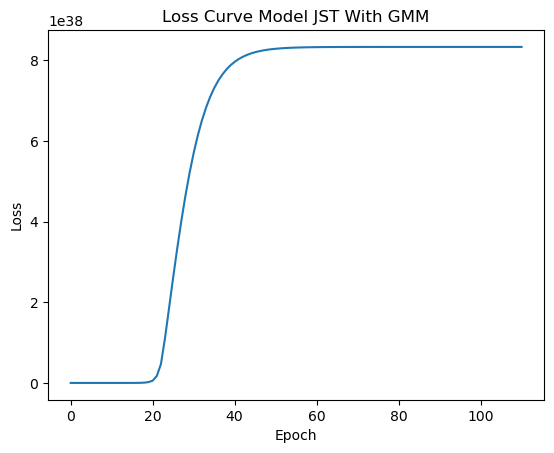

In [20]:
plt.plot(bp.loss_curve_)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve Model JST With GMM')

In [21]:
bp.predict(X_test)

array(['6', '34', '37', '38', '38', '34', '34', '6', '28', '22', '4', '2',
       '12', '30', '27', '28', '9', '14', '7', '17', '14', '25', '18',
       '28', '12', '17', '34', '24', '21', '6', '20', '38', '6', '3',
       '21', '9', '33', '31', '14', '13', '37', '30', '24', '16', '16',
       '34', '33', '18', '37', '32', '22', '34', '1', '36', '25', '4',
       '32', '11', '11', '3', '28', '27', '3', '13', '9', '39', '15',
       '24', '12', '29', '22', '12', '33', '40', '29', '26', '8', '13',
       '16', '27', '27', '11'], dtype='<U2')

In [22]:
print("Training set score: %f" % bp.score(X_train, y_train))
print("Test set score: %f" % bp.score(X_test, y_test))

Training set score: 1.000000
Test set score: 0.487805


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          11       0.67      1.00      0.80         2
          12       0.50      1.00      0.67         2
          13       0.67      1.00      0.80         2
          14       0.67      1.00      0.80         2
          15       1.00      0.50      0.67         2
          16       0.33      0.50      0.40         2
          17       0.00      0.00      0.00         2
          18       0.50      0.50      0.50         2
          19       0.00      0.00      0.00         2
           2       1.00      0.50      0.67         2
          20       0.00      0.00      0.00         2
          21       0.50      0.50      0.50         2
          22       0.67      1.00      0.80         2
          23       0.00      0.00      0.00         2
          24       0.67      1.00      0.80         2
          25       0.50    

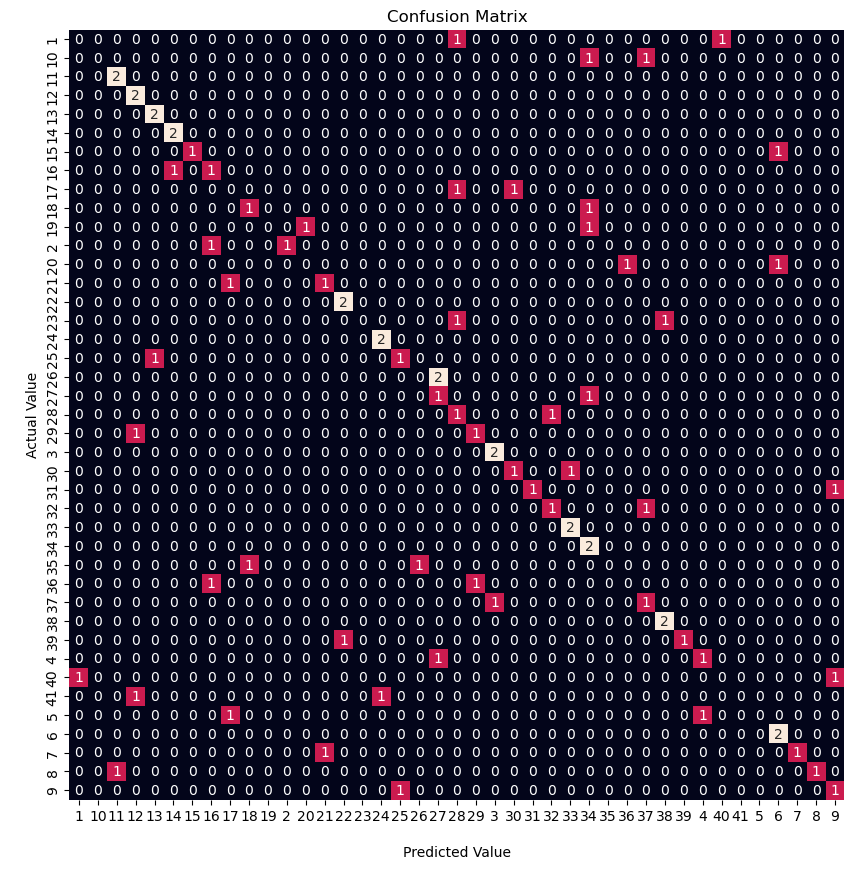

In [25]:
print(classification_report(y_test,bp.predict(X_test)))
f, ax = plt.subplots(figsize=(10,10))
cm=confusion_matrix(y_test,bp.predict(X_test), labels=bp.classes_)
cm=pd.DataFrame(cm, [bp.classes_],[bp.classes_])
ax =sns.heatmap(cm, annot=True, cbar=False)
ax.set_title('Confusion Matrix')
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('\nActual Value')

plt.show()

In [26]:
teridentifikasi = sum(np.diagonal(cm))
teridentifikasi

40

## Hyperparameter Tuning

In [27]:
cv = ShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 8) #number of re-shuffling&splitting iterations, test size, randomness of the training and testing indices prouced

param_grid = {
    'hidden_layer_sizes':[(5,),(10,),(15,),(20,),(25,),(30,),(35,),(40,),(45,),(50,),],
    'activation':['relu'],
    'solver': ['sgd'],
    'learning_rate':['adaptive'],
    'learning_rate_init':[0.0001,0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 
                          0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
                          0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09,
                          0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}

gridSearch = GridSearchCV(MLPClassifier(), param_grid, cv=cv, 
                          scoring=['recall_micro','f1_micro'],refit='f1_micro',verbose=2)
gridSearch.fit(X_train, y_train)
print('Score:', gridSearch.best_score_)
print('Parameters:',gridSearch.best_params_)

Fitting 1 folds for each of 360 candidates, totalling 360 fits
[CV] END activation=relu, hidden_layer_sizes=(5,), learning_rate=adaptive, learning_rate_init=0.0001, solver=sgd; total time=   5.0s
[CV] END activation=relu, hidden_layer_sizes=(5,), learning_rate=adaptive, learning_rate_init=0.0002, solver=sgd; total time=   5.6s
[CV] END activation=relu, hidden_layer_sizes=(5,), learning_rate=adaptive, learning_rate_init=0.0003, solver=sgd; total time=   6.8s
[CV] END activation=relu, hidden_layer_sizes=(5,), learning_rate=adaptive, learning_rate_init=0.0004, solver=sgd; total time=   7.1s
[CV] END activation=relu, hidden_layer_sizes=(5,), learning_rate=adaptive, learning_rate_init=0.0005, solver=sgd; total time=   6.8s
[CV] END activation=relu, hidden_layer_sizes=(5,), learning_rate=adaptive, learning_rate_init=0.0006, solver=sgd; total time=   5.6s
[CV] END activation=relu, hidden_layer_sizes=(5,), learning_rate=adaptive, learning_rate_init=0.0007, solver=sgd; total time=   5.4s
[CV] E

[CV] END activation=relu, hidden_layer_sizes=(10,), learning_rate=adaptive, learning_rate_init=0.09, solver=sgd; total time=   7.7s
[CV] END activation=relu, hidden_layer_sizes=(10,), learning_rate=adaptive, learning_rate_init=0.1, solver=sgd; total time=   8.0s
[CV] END activation=relu, hidden_layer_sizes=(10,), learning_rate=adaptive, learning_rate_init=0.2, solver=sgd; total time=   6.5s
[CV] END activation=relu, hidden_layer_sizes=(10,), learning_rate=adaptive, learning_rate_init=0.3, solver=sgd; total time=   3.8s
[CV] END activation=relu, hidden_layer_sizes=(10,), learning_rate=adaptive, learning_rate_init=0.4, solver=sgd; total time=   4.8s
[CV] END activation=relu, hidden_layer_sizes=(10,), learning_rate=adaptive, learning_rate_init=0.5, solver=sgd; total time=   4.8s
[CV] END activation=relu, hidden_layer_sizes=(10,), learning_rate=adaptive, learning_rate_init=0.6, solver=sgd; total time=   4.7s
[CV] END activation=relu, hidden_layer_sizes=(10,), learning_rate=adaptive, learni

[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.008, solver=sgd; total time=  10.4s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.009, solver=sgd; total time=   9.6s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.01, solver=sgd; total time=  10.2s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.02, solver=sgd; total time=   9.0s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.03, solver=sgd; total time=   7.3s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.04, solver=sgd; total time=   5.7s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   5.6s
[CV] END activation=relu, hidden_layer_sizes=(20,), learning_rate=adaptive

[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.0007, solver=sgd; total time=   7.8s
[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.0008, solver=sgd; total time=   7.2s
[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.0009, solver=sgd; total time=   7.0s
[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   7.1s
[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.002, solver=sgd; total time=   7.6s
[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.003, solver=sgd; total time=   7.5s
[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=adaptive, learning_rate_init=0.004, solver=sgd; total time=   7.5s
[CV] END activation=relu, hidden_layer_sizes=(30,), learning_rate=

[CV] END activation=relu, hidden_layer_sizes=(35,), learning_rate=adaptive, learning_rate_init=0.6, solver=sgd; total time=   3.6s
[CV] END activation=relu, hidden_layer_sizes=(35,), learning_rate=adaptive, learning_rate_init=0.7, solver=sgd; total time=   3.7s
[CV] END activation=relu, hidden_layer_sizes=(35,), learning_rate=adaptive, learning_rate_init=0.8, solver=sgd; total time=   3.6s
[CV] END activation=relu, hidden_layer_sizes=(35,), learning_rate=adaptive, learning_rate_init=0.9, solver=sgd; total time=   3.6s
[CV] END activation=relu, hidden_layer_sizes=(40,), learning_rate=adaptive, learning_rate_init=0.0001, solver=sgd; total time=   7.1s
[CV] END activation=relu, hidden_layer_sizes=(40,), learning_rate=adaptive, learning_rate_init=0.0002, solver=sgd; total time=   7.0s
[CV] END activation=relu, hidden_layer_sizes=(40,), learning_rate=adaptive, learning_rate_init=0.0003, solver=sgd; total time=   7.2s
[CV] END activation=relu, hidden_layer_sizes=(40,), learning_rate=adaptive

[CV] END activation=relu, hidden_layer_sizes=(45,), learning_rate=adaptive, learning_rate_init=0.05, solver=sgd; total time=   4.0s
[CV] END activation=relu, hidden_layer_sizes=(45,), learning_rate=adaptive, learning_rate_init=0.06, solver=sgd; total time=   3.9s
[CV] END activation=relu, hidden_layer_sizes=(45,), learning_rate=adaptive, learning_rate_init=0.07, solver=sgd; total time=   3.9s
[CV] END activation=relu, hidden_layer_sizes=(45,), learning_rate=adaptive, learning_rate_init=0.08, solver=sgd; total time=   4.3s
[CV] END activation=relu, hidden_layer_sizes=(45,), learning_rate=adaptive, learning_rate_init=0.09, solver=sgd; total time=   4.2s
[CV] END activation=relu, hidden_layer_sizes=(45,), learning_rate=adaptive, learning_rate_init=0.1, solver=sgd; total time=   4.3s
[CV] END activation=relu, hidden_layer_sizes=(45,), learning_rate=adaptive, learning_rate_init=0.2, solver=sgd; total time=   3.9s
[CV] END activation=relu, hidden_layer_sizes=(45,), learning_rate=adaptive, le